# CIFAR10 Dataset Using KNN Algorithm

### Description:
Images were read from train folder while checking there's no broken images. Then each images of each classes were stored in a tuple of the same class name where first element was the flatten 1-d array of the image and 2nd element was the co-responsing class name. Then all tuples of the classes were concated together. Then, two list was created where arrays of the images stored in one and the labels were stored in another. Then they were converted into numpy array. Same steps were conducted with test data. Then knn was applied with L1 distance and here the value of k was 3. Then knn was applied with different values of k and with spliting the training data into 5 folds. Lastly, the variations of accuracies were shown by ploting them. I tried to plot the accuracies for dofferent folds with L1 distance too. But it took so much time for computing in this way and even after an hour it hadn't finished computing.

## Installing opencv

In [1]:
pip install opencv_contrib_python

Note: you may need to restart the kernel to use updated packages.


## Installing tqdm

In [2]:
pip install tqdm

## Installing Pakage

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import math 
import random

# Load image datasets to train_data array

In [44]:
TRAIN_DIR = r'D:\CIFAR-10-images-master\CIFAR-10-images-master\train'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [45]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR,c)
    class_num = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_arr = cv2.imread(os.path.join(path,img))
        TRAIN_DATA.append({
            'image': img_arr,
            'class': class_num
        })
print(len(TRAIN_DATA))

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:00<00:00, 6646.56it/s]

50000


# Suffle the data

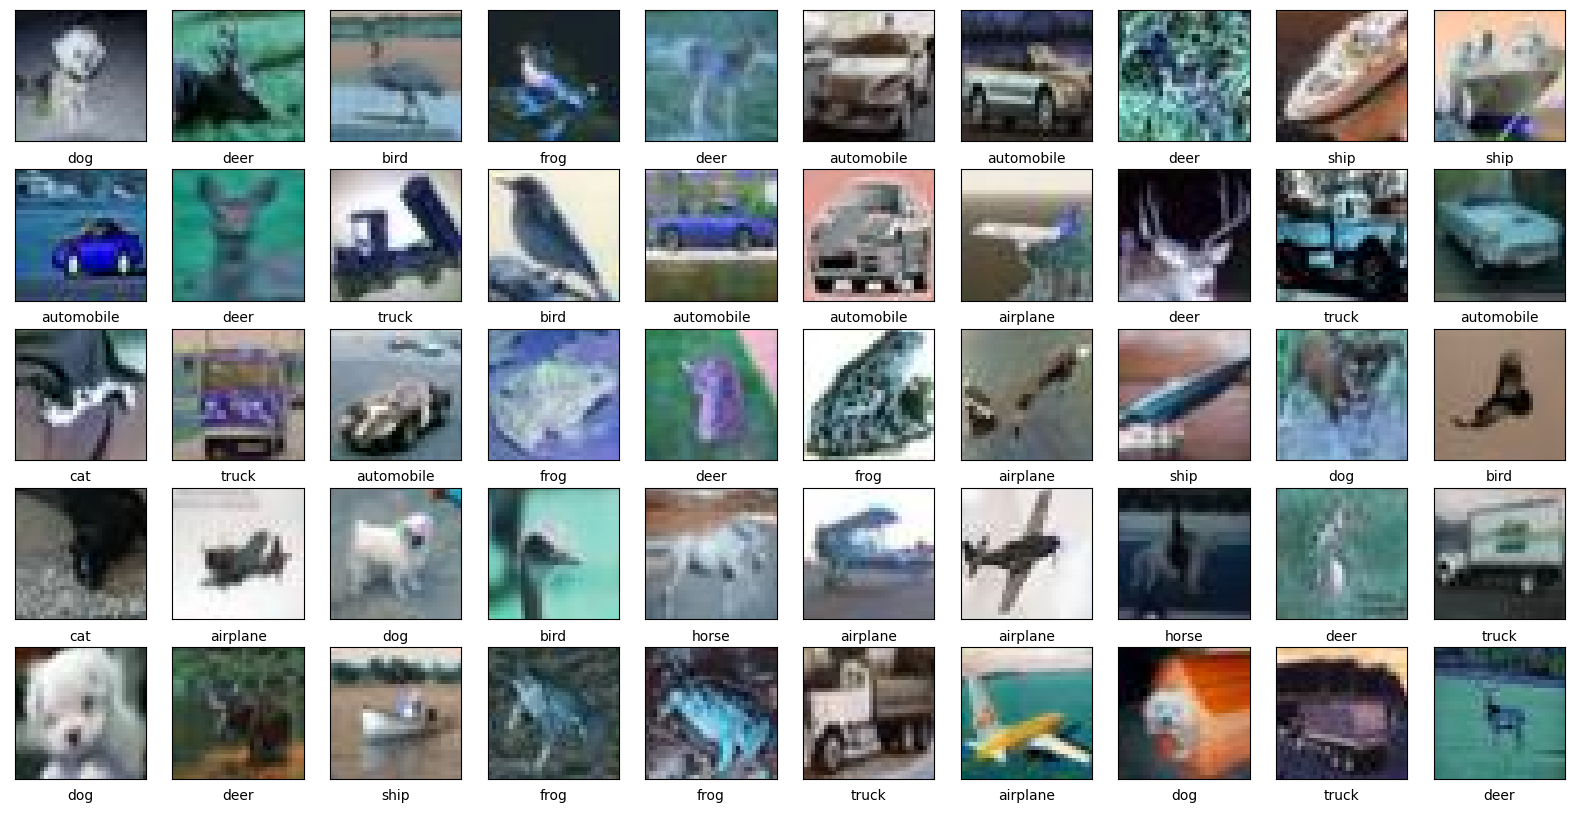

In [50]:
random.shuffle(TRAIN_DATA)
plt.figure(figsize=(20,10))

for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i]['image'])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i]['class']])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()

# Using Dataset folding and define train data split function

In [51]:
# folding data
f0 = TRAIN_DATA[0:1000]
f1 = TRAIN_DATA[1000:2000]
f2 = TRAIN_DATA[2000:3000]
f3 = TRAIN_DATA[3000:4000]
f4 = TRAIN_DATA[4000:5000]

def train_test_split(X, y, test_size=0.2):
    X_train = X[:int(len(X)*(1-test_size))]
    X_test = X[int(len(X)*(1-test_size)):]
    y_train = y[:int(len(y)*(1-test_size))]
    y_test = y[int(len(y)*(1-test_size)):]
    return X_train, X_test, y_train, y_test

# KNN Manhattan Distance Calculation

In [27]:
def l1_distance(test,k):    
    x=[]

    for i in range(0,len(TRAIN_DATA)):
        x.append(np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(TRAIN_DATA))):
            if np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten())))==x[j]:
                print(CATEGORIES[TRAIN_DATA[i][1]])
                break

# Predicting a Single Test Image

In [28]:
def l1_distance_accuracy(test,k):    
    x=[]
    prediction_array = []
    for i in range(0,len(TRAIN_DATA)):
        x.append(np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten()))))

    for j in (np.argsort(x)[:k]):
        for i in (range(0,len(TRAIN_DATA))): #for i in tqdm(range(0,len(train_data))):
            if np.sum(abs(np.subtract(TRAIN_DATA[i][0].flatten(),test.flatten())))==x[j]:
                #print(CATEGORIES[train_data[i][1]])
                prediction_array.append(TRAIN_DATA[i][1])
                break

    #print(prediction_array)
    
    check = []
    for i in range(0, len(CATEGORIES)):
        a = 0
        for j in range(0, k):
            if i == prediction_array[j]:
                a = a+1
        check.append(a)
            
    for final_prediction in range(0,len(CATEGORIES)):
        if check[final_prediction] == max(check):
            #print('Prediction : ' +CATEGORIES[final_prediction])
            return final_prediction

Text(0.5, 0, 'airplane')

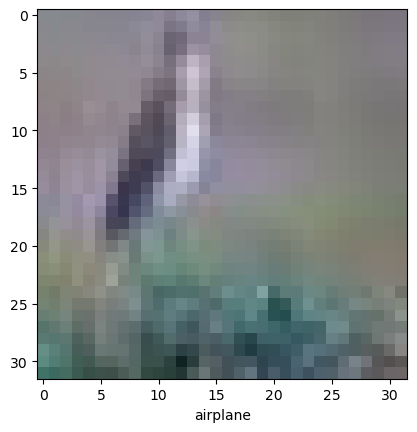

In [17]:
plt.imshow(TRAIN_DATA[1036][0],cmap=plt.cm.gray)
plt.xlabel(CATEGORIES[TRAIN_DATA[436][1]])

# Define KNN Class 
-  K = number of neighbors

- fit = function that accept X (observed data/Features), y (target data/result)

- predict = function that accepts X_test is the test datasets, l_function = "l2" and "l1"

- accurecy = check the how many actually prediction it can predict [0-1]

In [52]:
class KNeighborClassifer:
    k = None

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def accuracy(self, y_actual, y_pred):
        return np.sum(y_actual == y_pred) / len(y_actual)
    
    def predict(self, X_test, l_func = "l2"):
        y_predtion = [] 
        i = 0
        for x in tqdm(X_test):
            distances = []
            for i in range(len(self.X)):
                if l_func == "l2":
                    distance = np.sqrt(np.sum((x - self.X[i])**2))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
                elif l_func == "l1":
                    distance = np.sum(np.abs(x - self.X[i]))
                    distances.append({
                        'distance': distance,
                        'class': self.y[i]
                    })
            distances.sort(key=lambda x: x['distance'])
            k_nearest = distances[:self.k]
            k_nearest_classes = [x['class'] for x in k_nearest]
            y_predtion.append(max(set(k_nearest_classes), key=k_nearest_classes.count))
        return y_predtion
        

# k neighbours value starts from 1 - 10
Plot the accuracy l1 vs l2 in graph

In [53]:

X = np.array([i['image'] for i in TRAIN_DATA[:5000]])
y = np.array([i['class'] for i in TRAIN_DATA[:5000]])

l1_accuracies = {}
l2_accuracies = {}

k_neighbors = np.arange(1, 10)

for k in tqdm(k_neighbors):
    knn = KNeighborClassifer(k)
    
    X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    knn.fit(X_train, y_train)

    y_pred_l1 = knn.predict(X_test, l_func="l1")
    y_pred_l2 = knn.predict(X_test, l_func="l2")

   
    l1_accuracies[k] = knn.accuracy(y_test, y_pred_l1)
    l2_accuracies[k] = knn.accuracy(y_test, y_pred_l2)

    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")
    print(f"for k = {k} l1 accuracy is {l1_accuracies[k]} and l2 accuracy is {l2_accuracies[k]}")



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.09it/s]

 11%|█████████▏                                                                         | 1/9 [02:54<23:17, 174.67s/it]

for k = 1 l1 accuracy is 0.209 and l2 accuracy is 0.194
for k = 1 l1 accuracy is 0.209 and l2 accuracy is 0.194



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:20<00:00, 12.35it/s]

 22%|██████████████████▍                                                                | 2/9 [05:33<19:19, 165.58s/it]

for k = 2 l1 accuracy is 0.205 and l2 accuracy is 0.181
for k = 2 l1 accuracy is 0.205 and l2 accuracy is 0.181



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:25<00:00, 11.63it/s]

 33%|███████████████████████████▋                                                       | 3/9 [09:25<19:35, 195.86s/it]

for k = 3 l1 accuracy is 0.221 and l2 accuracy is 0.178
for k = 3 l1 accuracy is 0.221 and l2 accuracy is 0.178



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:38<00:00,  6.30it/s]

 44%|████████████████████████████████████▉                                              | 4/9 [15:12<21:16, 255.33s/it]

for k = 4 l1 accuracy is 0.212 and l2 accuracy is 0.198
for k = 4 l1 accuracy is 0.212 and l2 accuracy is 0.198



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:59<00:00,  5.57it/s]

 56%|██████████████████████████████████████████████                                     | 5/9 [21:24<19:49, 297.32s/it]

for k = 5 l1 accuracy is 0.216 and l2 accuracy is 0.2
for k = 5 l1 accuracy is 0.216 and l2 accuracy is 0.2



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:43<00:00,  6.13it/s]

 67%|███████████████████████████████████████████████████████▎                           | 6/9 [27:08<15:40, 313.49s/it]

for k = 6 l1 accuracy is 0.226 and l2 accuracy is 0.206
for k = 6 l1 accuracy is 0.226 and l2 accuracy is 0.206



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:37<00:00,  6.34it/s]

 78%|████████████████████████████████████████████████████████████████▌                  | 7/9 [32:53<10:47, 323.70s/it]

for k = 7 l1 accuracy is 0.212 and l2 accuracy is 0.215
for k = 7 l1 accuracy is 0.212 and l2 accuracy is 0.215



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:48<00:00,  5.93it/s]

 89%|█████████████████████████████████████████████████████████████████████████▊         | 8/9 [38:46<05:33, 333.01s/it]

for k = 8 l1 accuracy is 0.221 and l2 accuracy is 0.217
for k = 8 l1 accuracy is 0.221 and l2 accuracy is 0.217



100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:41<00:00,  6.19it/s]

100%|███████████████████████████████████████████████████████████████████████████████████| 9/9 [44:41<00:00, 297.96s/it]

for k = 9 l1 accuracy is 0.209 and l2 accuracy is 0.222
for k = 9 l1 accuracy is 0.209 and l2 accuracy is 0.222


# Ploting accuracy L1 Vs L2 Distance

- L1 distance describes manhatten distance
- L2 distance describes eucledian distance

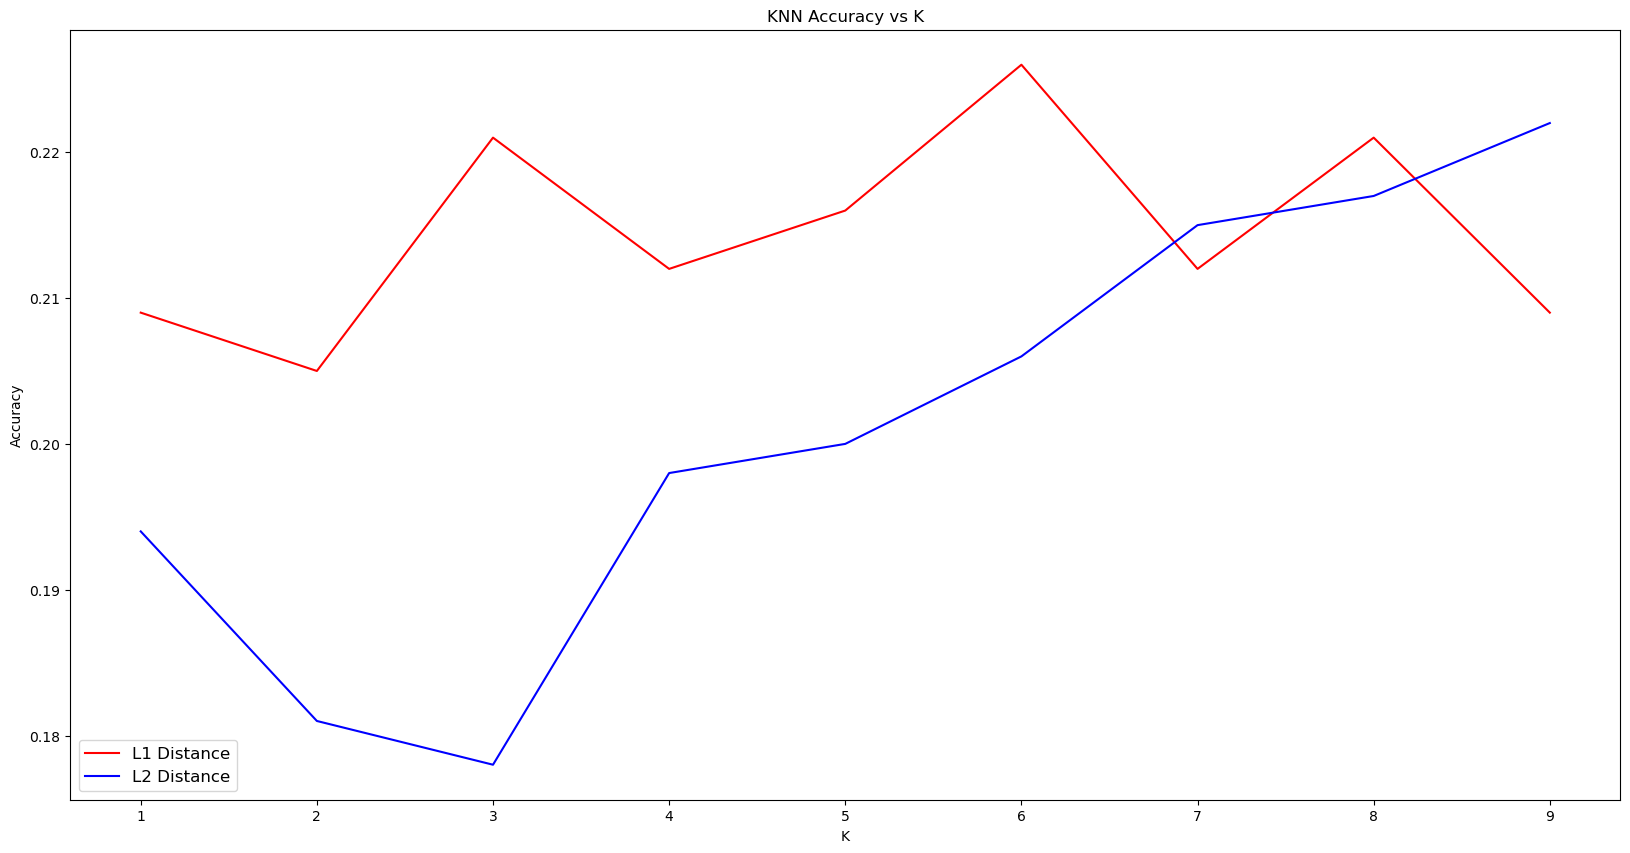

In [54]:
plt.figure(figsize=(20,10))
plt.title("KNN Accuracy vs K")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.plot(k_neighbors, list(l1_accuracies.values()), label="L1 Distance", color="red")
plt.plot(k_neighbors, list(l2_accuracies.values()), label="L2 Distance", color="blue")
plt.xticks(k_neighbors)
plt.legend([
    "L1 Distance",
    "L2 Distance"
], loc="lower left", fontsize=12)
plt.show()

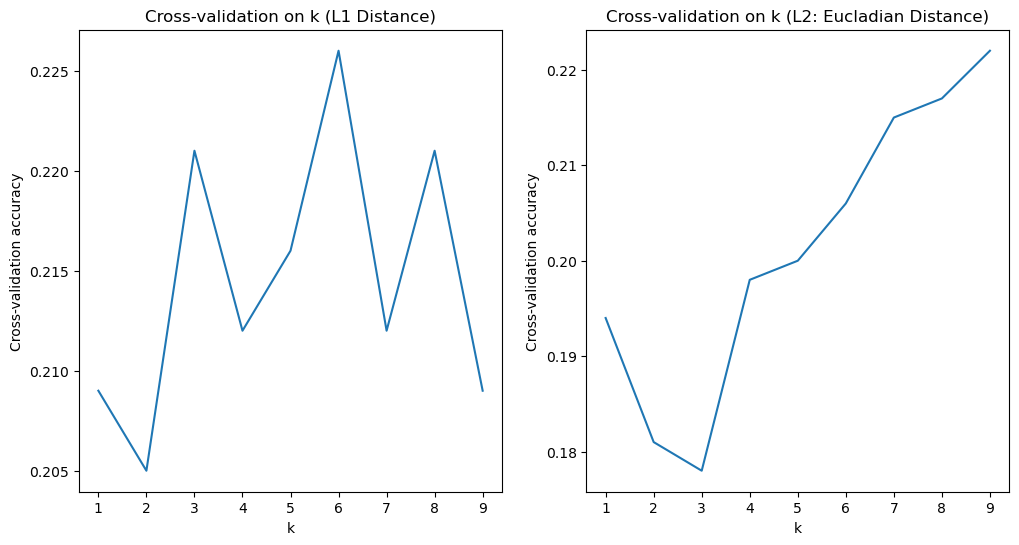

In [74]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for L1 distance
for a in k_neighbors:
    accuracies2 = l1_accuracies.values()
    

accuracies_mean = np.array([np.mean(v) for k,v in sorted(l1_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(l1_accuracies.items())])
ax1.errorbar(k_neighbors, accuracies_mean, yerr=accuracies_std)
ax1.set_title('Cross-validation on k (L1 Distance)')
ax1.set_xlabel('k')
ax1.set_ylabel('Cross-validation accuracy')


# Plot for L2 distance
for a in k_neighbors:
    accuracies2 = l2_accuracies.values()
    

accuracies_mean = np.array([np.mean(v) for k,v in sorted(l2_accuracies.items())])
accuracies_std = np.array([np.std(v) for k,v in sorted(l2_accuracies.items())])
ax2.errorbar(k_neighbors, accuracies_mean, yerr=accuracies_std)
ax2.set_title('Cross-validation on k (L2: Eucladian Distance)')
ax2.set_xlabel('k')
ax2.set_ylabel('Cross-validation accuracy')

plt.show()



In [75]:
def bestAccuracy(accuracies):
    best_k = max(accuracies, key=accuracies.get)
    bestAccuracy = accuracies[best_k]
    return best_k, bestAccuracy

best_k_l1, bestAccuracy_l1 = bestAccuracy(l1_accuracies)
best_k_l2, bestAccuracy_l2 = bestAccuracy(l2_accuracies)

print(f"Best K for L1 Distance is {best_k_l1} with accuracy {bestAccuracy_l1}")

Best K for L1 Distance is 6 with accuracy 0.226
